<a href="https://colab.research.google.com/github/borhanur-rahman/AI_Assignments/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Assignment 2
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model



inputs = Input(shape=(28, 28), name='input_layer')

x = Dense(8, activation='relu', name='hidden1')(inputs)
x = Dense(16, activation='relu', name='hidden2')(x)
x = Dense(32, activation='relu', name='hidden3')(x)
x = Dense(64, activation='relu', name='hidden4')(x)
x = Dense(128, activation='relu', name='hidden5')(x)
x = Dense(256, activation='relu', name='hidden6')(x)
x = Dense(512, activation='relu', name='hidden7')(x)
x = Dense(32, activation='relu', name='hidden8')(x)
x = Dense(16, activation='relu', name='hidden9')(x)

outputs = Dense(10, activation='softmax', name='output_layer')(x)
model = Model(inputs=inputs, outputs=outputs, name="Deep_FCFNN_Model")


model.summary(show_trainable=True)


Model: "Deep_FCFNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 28, 28)        │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden1 (Dense)             │ (None, 28, 8)         │        232 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden2 (Dense)             │ (None, 28, 16)        │        144 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden3 (Dense)             │ (None, 28, 32)        │        544 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden4 (Dense)             │ (None, 28, 64)        │      2,112 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden5 (Dense)             │ (None, 28, 128)       │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden6 (Dense)             │ (None, 28, 256)       │     33,024 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden7 (Dense)             │ (None, 28, 512)       │    131,584 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden8 (Dense)             │ (None, 28, 32)        │     16,416 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden9 (Dense)             │ (None, 28, 16)        │        528 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 28, 10)        │        170 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 193,074 (754.20 KB)

 Trainable params: 193,074 (754.20 KB)

 Non-trainable params: 0 (0.00 B)


Equation: y = 5x + 10
Test MAE: 0.025459449738264084
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


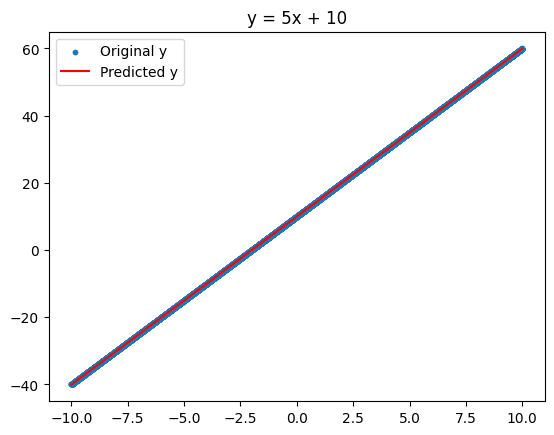


Equation: y = 3x^2 + 5x + 10
Test MAE: 0.4229949116706848
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


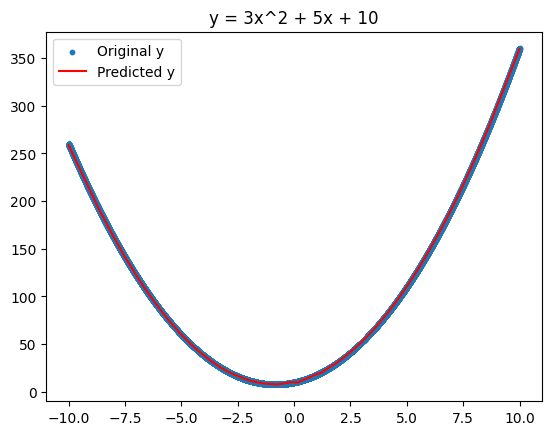


Equation: y = 4x^3 + 3x^2 + 5x + 10
Test MAE: 28.15232276916504
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


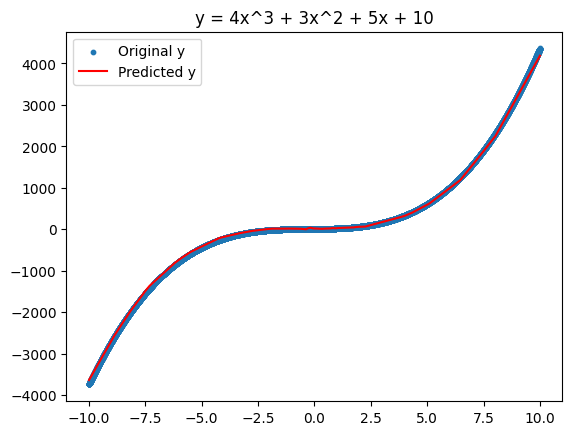

In [1]:

#Assignment 3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model



x = np.linspace(-10, 10, 10000)
x = x.reshape(-1, 1)

y1 = 5*x + 10
y2 = 3*(x**2) + 5*x + 10
y3 = 4*(x**3) + 3*(x**2) + 5*x + 10




def split_data(x, y):
    X_train, X_temp, y_train, y_temp = train_test_split(
        x, y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test




def build_model():

    inputs = Input(shape=(1,), name='input_layer')

    x = Dense(8, activation='relu', name='hidden1')(inputs)
    x = Dense(16, activation='relu', name='hidden2')(x)
    x = Dense(32, activation='relu', name='hidden3')(x)
    x = Dense(64, activation='relu', name='hidden4')(x)
    x = Dense(128, activation='relu', name='hidden5')(x)
    x = Dense(64, activation='relu', name='hidden6')(x)
    x = Dense(32, activation='relu', name='hidden7')(x)
    x = Dense(16, activation='relu', name='hidden8')(x)

    outputs = Dense(1, activation='linear', name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs, name="Deep_FCFNN_Model")

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model




def train_and_plot(x, y, equation_name):

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(x, y)

    model = build_model()

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        verbose=0
    )

    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"\nEquation: {equation_name}")
    print("Test MAE:", test_mae)

    y_pred = model.predict(x)

    plt.figure()
    plt.scatter(x, y, label="Original y", s=10)
    plt.plot(x, y_pred, color='red', label="Predicted y")
    plt.title(equation_name)
    plt.legend()
    plt.show()




train_and_plot(x, y1, "y = 5x + 10")
train_and_plot(x, y2, "y = 3x^2 + 5x + 10")
train_and_plot(x, y3, "y = 4x^3 + 3x^2 + 5x + 10")

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10



def build_fcf_nn(input_shape, num_classes):

    inputs = Input(shape=input_shape, name='input_layer')

    x = Flatten()(inputs)

    x = Dense(512, activation='relu', name='hidden1')(x)
    x = Dense(256, activation='relu', name='hidden2')(x)
    x = Dense(128, activation='relu', name='hidden3')(x)
    x = Dense(64, activation='relu', name='hidden4')(x)
    x = Dense(32, activation='relu', name='hidden5')(x)

    outputs = Dense(num_classes, activation='softmax',
                    name='output_layer')(x)

    model = Model(inputs=inputs, outputs=outputs,
                  name="FCFNN_Classifier")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model




def train_and_evaluate(dataset_name, x_train, y_train,
                       x_test, y_test, input_shape):

    print(f"\nTraining on {dataset_name}")

    num_classes = 10

    # Normalize images
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    model = build_fcf_nn(input_shape, num_classes)

    model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print(f"{dataset_name} Test Accuracy:", test_acc)




(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

train_and_evaluate(
    "MNIST",
    x_train_m, y_train_m,
    x_test_m, y_test_m,
    input_shape=(28, 28)
)




(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

train_and_evaluate(
    "Fashion MNIST",
    x_train_f, y_train_f,
    x_test_f, y_test_f,
    input_shape=(28, 28)
)




(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()

# CIFAR labels shape (n,1) → flatten
y_train_c = y_train_c.flatten()
y_test_c = y_test_c.flatten()

train_and_evaluate(
    "CIFAR-10",
    x_train_c, y_train_c,
    x_test_c, y_test_c,
    input_shape=(32, 32, 3)
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training on MNIST
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8318 - loss: 0.5576 - val_accuracy: 0.9668 - val_loss: 0.1197
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1042 - val_accuracy: 0.9697 - val_loss: 0.0969
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0648 - val_accuracy: 0.9760 - val_loss: 0.0810
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0466 - val_accuracy: 0.9768 - val_loss: 0.0768
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9773 - val_loss: 0.0762
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 0.9783 - val_loss: 0.0827
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9793 - val_loss: 0.0891
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━

In [3]:


#Assignment 8
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10




def build_cnn(input_shape, num_classes):

    inputs = Input(shape=input_shape, name='input_layer')

    # Convolution Block 1
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2,2))(x)

    # Convolution Block 2
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)

    # Convolution Block 3
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)

    # Fully Connected
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs, name="CNN_Classifier")

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



def train_and_evaluate(dataset_name, x_train, y_train,
                       x_test, y_test, input_shape):

    print(f"\nTraining on {dataset_name}")

    # Normalize
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    model = build_cnn(input_shape, 10)

    model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=10,
        batch_size=128,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print(f"{dataset_name} Test Accuracy:", test_acc)




(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

# Add channel dimension
x_train_m = np.expand_dims(x_train_m, -1)
x_test_m = np.expand_dims(x_test_m, -1)

train_and_evaluate(
    "MNIST",
    x_train_m, y_train_m,
    x_test_m, y_test_m,
    input_shape=(28, 28, 1)
)




(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

x_train_f = np.expand_dims(x_train_f, -1)
x_test_f = np.expand_dims(x_test_f, -1)

train_and_evaluate(
    "Fashion MNIST",
    x_train_f, y_train_f,
    x_test_f, y_test_f,
    input_shape=(28, 28, 1)
)




(x_train_c, y_train_c), (x_test_c, y_test_c) = cifar10.load_data()

# Flatten labels
y_train_c = y_train_c.flatten()
y_test_c = y_test_c.flatten()

train_and_evaluate(
    "CIFAR-10",
    x_train_c, y_train_c,
    x_test_c, y_test_c,
    input_shape=(32, 32, 3)
)


Training on MNIST
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8338 - loss: 0.5309 - val_accuracy: 0.9850 - val_loss: 0.0561
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0562 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0354 - val_accuracy: 0.9898 - val_loss: 0.0450
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9928 - val_loss: 0.0285
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9925 - val_loss: 0.0317
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9937 - val_loss: 0.0277
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9955 - loss: 0.0123 - val_accuracy: 0.9922 - val_loss: 0.0355
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9959 - loss: 0.01

In [4]:
#Assignment 8
import tensorflow as tf
from tensorflow.keras import layers, models

# ---------------- CONFIG ----------------
IMG_SIZE = (224, 224)   # VGG usually uses 224x224
NUM_CLASSES = 10        # Change according to your dataset

# ---------------- BUILD VGG16-LIKE MODEL ----------------
def build_vgg16_like():

    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=IMG_SIZE+(3,)))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 2
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 3
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 4
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Block 5
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Fully Connected Layers (VGG style)
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model


# ---------------- CREATE MODEL ----------------
model = build_vgg16_like()

# ---------------- COMPILE ----------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ---------------- SUMMARY ----------------
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,301,514 (512.32 MB)

 Trainable params: 134,301,514 (512.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

#Assignment 9
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as res_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mob_pre

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model



IMG_PATH = "/content/sample_data/flower.jpeg"

def load_img(path, size=(224,224)):
    img = image.load_img(path, target_size=size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img


def visualize_feature_maps(model, img_array, preprocess_func, layer_names, model_name):

    img = preprocess_func(img_array.copy())


    outputs = [model.get_layer(name).output for name in layer_names]
    feature_model = Model(inputs=model.input, outputs=outputs)

    feature_maps = feature_model.predict(img)

    for fmap, lname in zip(feature_maps, layer_names):

        n_features = fmap.shape[-1]
        size = fmap.shape[1]

        display_maps = min(8, n_features)

        plt.figure(figsize=(15,3))
        plt.suptitle(f"{model_name} - Layer: {lname}", fontsize=14)

        for i in range(display_maps):
            ax = plt.subplot(1, display_maps, i+1)

            x = fmap[0, :, :, i]
            x -= x.mean()
            x /= (x.std() + 1e-5)
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            plt.imshow(x, cmap='viridis')
            plt.axis("off")

        plt.show()




vgg_model = VGG16(weights='imagenet', include_top=False)

vgg_layers = [
    "block1_conv1",   # early
    "block3_conv1",   # middle
    "block5_conv1"    # deep
]

img_vgg = load_img(IMG_PATH)

visualize_feature_maps(
    model=vgg_model,
    img_array=img_vgg,
    preprocess_func=vgg_pre,
    layer_names=vgg_layers,
    model_name="VGG16"
)




resnet_model = ResNet50(weights='imagenet', include_top=False)

resnet_layers = [
    "conv1_conv",        # early
    "conv3_block1_out",  # middle
    "conv5_block1_out"   # deep
]

img_res = load_img(IMG_PATH)

visualize_feature_maps(
    model=resnet_model,
    img_array=img_res,
    preprocess_func=res_pre,
    layer_names=resnet_layers,
    model_name="ResNet50"
)




mobilenet_model = MobileNetV2(weights='imagenet', include_top=False)

mobilenet_layers = [
    "Conv1",                # early
    "block_6_expand_relu",  # middle
    "block_13_expand_relu"  # deep
]

img_mob = load_img(IMG_PATH)

visualize_feature_maps(
    model=mobilenet_model,
    img_array=img_mob,
    preprocess_func=mob_pre,
    layer_names=mobilenet_layers,
    model_name="MobileNetV2"
)

In [ ]:

#Assignment 10
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os



DATASET_PATH = "/kaggle/input/dogs-vs-cats"

# Kaggle dataset usually has train folder only.
# We split using validation_split

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



def create_model(mode="freeze_all"):

    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224,224,3)
    )

    # -------- Transfer Learning --------
    if mode == "freeze_all":
        base_model.trainable = False

    # -------- Partial Fine-Tuning --------
    elif mode == "partial":
        base_model.trainable = True
        for layer in base_model.layers[:-4]:
            layer.trainable = False

    # -------- Full Fine-Tuning --------
    elif mode == "full":
        base_model.trainable = True

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs=base_model.input, outputs=output)

    if mode == "freeze_all":
        lr = 1e-3
    else:
        lr = 1e-5

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model




print("\nTraining: Transfer Learning (All VGG16 layers frozen)")
model_transfer = create_model("freeze_all")

history_transfer = model_transfer.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)



print("\nTraining: Partial Fine-Tuning (Last 4 layers unfrozen)")
model_partial = create_model("partial")

history_partial = model_partial.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)



print("\nTraining: Full Fine-Tuning (All VGG16 layers unfrozen)")
model_full = create_model("full")

history_full = model_full.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


plt.figure(figsize=(8,5))

plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning')
plt.plot(history_partial.history['val_accuracy'], label='Partial Fine-Tuning')
plt.plot(history_full.history['val_accuracy'], label='Full Fine-Tuning')

plt.title("Effect of Fine-Tuning on Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
#Assignment 11

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert to 3 channels (because MobileNet expects RGB)
x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)

# Resize to 96x96 (MobileNetV2 minimum size)
x_train = tf.image.resize(x_train, (96,96)).numpy()
x_test = tf.image.resize(x_test, (96,96)).numpy()

# Use smaller subset for faster PCA & t-SNE
x_subset = x_test[:2000]
y_subset = y_test[:2000]


base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(96,96,3)
)

base_model.trainable = False

# Global pooling for feature extraction
feature_extractor = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D()
])



features_before = feature_extractor.predict(x_subset)



# Add classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train only classifier head
model.fit(x_train[:10000], y_train[:10000],
          epochs=3,
          batch_size=32,
          validation_split=0.1)



features_after = feature_extractor.predict(x_subset)


pca = PCA(n_components=2)

pca_before = pca.fit_transform(features_before)
pca_after = pca.fit_transform(features_after)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(pca_before[:,0], pca_before[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("PCA Before Transfer Learning")

plt.subplot(1,2,2)
plt.scatter(pca_after[:,0], pca_after[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("PCA After Transfer Learning")

plt.show()



tsne = TSNE(n_components=2, random_state=42)

tsne_before = tsne.fit_transform(features_before)
tsne_after = tsne.fit_transform(features_after)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(tsne_before[:,0], tsne_before[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("t-SNE Before Transfer Learning")

plt.subplot(1,2,2)
plt.scatter(tsne_after[:,0], tsne_after[:,1], c=y_subset, cmap='tab10', s=5)
plt.title("t-SNE After Transfer Learning")

plt.show()

In [ ]:

#Assignment 12

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import time



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Validation split
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_train = x_train[:-5000]
y_train = y_train[:-5000]


def get_augmentation(mode):

    if mode == "none":
        return None

    elif mode == "flip":
        return tf.keras.Sequential([
            layers.RandomFlip("horizontal")
        ])

    elif mode == "flip_rotation":
        return tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1)
        ])

    elif mode == "full":
        return tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.2)
        ])



def build_model(augmentation_layer=None):

    inputs = layers.Input(shape=(32,32,3))

    x = inputs

    if augmentation_layer:
        x = augmentation_layer(x)

    x = layers.Conv2D(32, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model



def train_model(mode):

    print("\nTraining with:", mode)

    augmentation = get_augmentation(mode)
    model = build_model(augmentation)

    print("Total Parameters:", model.count_params())

    start = time.time()

    history = model.fit(
        x_train, y_train,
        epochs=10,
        validation_data=(x_val, y_val),
        verbose=1
    )

    end = time.time()

    val_acc = history.history['val_accuracy'][-1]

    print("Final Validation Accuracy:", round(val_acc,4))
    print("Training Time:", round(end-start,2), "seconds")

    return val_acc, history


modes = ["none", "flip", "flip_rotation", "full"]
results = {}

for mode in modes:
    acc, hist = train_model(mode)
    results[mode] = acc


plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Effect of Data Augmentation on Validation Accuracy")
plt.ylabel("Validation Accuracy")
plt.show()

print("\nFinal Comparison:")
for k,v in results.items():
    print(k, ":", round(v,4))

In [ ]:


#Assignment 13
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Split validation set
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]



def build_model(use_dropout=False, use_augmentation=False):

    model = models.Sequential()

    # Data Augmentation Layer
    if use_augmentation:
        model.add(layers.RandomFlip("horizontal"))
        model.add(layers.RandomRotation(0.1))
        model.add(layers.RandomZoom(0.1))

    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    if use_dropout:
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model




def train_model(title, use_dropout=False, use_augmentation=False):

    print("\nTraining:", title)

    model = build_model(use_dropout, use_augmentation)

    history = model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=64,
        validation_data=(x_val, y_val),
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print("Test Accuracy:", round(test_acc,4))

    return history


# ============================================
# 4. Run Experiments
# ============================================

hist_baseline = train_model("Baseline (No Dropout, No Augmentation)")
hist_dropout  = train_model("With Dropout", use_dropout=True)
hist_aug      = train_model("With Data Augmentation", use_augmentation=True)
hist_both     = train_model("Dropout + Augmentation", use_dropout=True, use_augmentation=True)




def plot_history(history, title):
    plt.figure()
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history(hist_baseline, "Baseline")
plot_history(hist_dropout, "Dropout")
plot_history(hist_aug, "Data Augmentation")
plot_history(hist_both, "Dropout + Augmentation")

In [ ]:
#Assignment 14

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical



(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten labels for sparse loss
y_train_sparse = y_train.flatten()
y_test_sparse  = y_test.flatten()

# One-hot encode for categorical loss
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)



def build_model(activation="relu", num_classes=10):

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation=activation, input_shape=(32,32,3)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation=activation),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), activation=activation),

        layers.Flatten(),
        layers.Dense(128, activation=activation),

        layers.Dense(num_classes, activation="softmax")
    ])

    return model



def train_and_evaluate(activation, loss_type):

    print("\n========================================")
    print(f"Activation: {activation}")
    print(f"Loss: {loss_type}")
    print("========================================")

    model = build_model(activation=activation)

    if loss_type == "sparse":
        model.compile(
            optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
        )
        history = model.fit(
            x_train, y_train_sparse,
            epochs=5,
            batch_size=64,
            validation_split=0.2,
            verbose=1
        )
        test_loss, test_acc = model.evaluate(x_test, y_test_sparse, verbose=0)

    else:  # categorical
        model.compile(
            optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"]
        )
        history = model.fit(
            x_train, y_train_cat,
            epochs=5,
            batch_size=64,
            validation_split=0.2,
            verbose=1
        )
        test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)

    print("Test Accuracy:", round(test_acc,4))

    return test_acc, history



activations = ["relu", "tanh", "sigmoid"]
losses = ["sparse", "categorical"]

results = {}

for act in activations:
    for loss in losses:
        acc, hist = train_and_evaluate(act, loss)
        results[(act, loss)] = acc

# ======================================================
# 5. PRINT FINAL COMPARISON
# ======================================================

print("\n========== FINAL RESULTS ==========")

for key, value in results.items():
    print("Activation:", key[0],
          "| Loss:", key[1],
          "| Test Accuracy:", round(value,4))